In [14]:
from utils import *
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
df_original = pd.read_csv("data/M.csv") \
                .pipe(clean_data)

df_hogar = (df_original
                .pipe(return_hogar_movements)
           )

In [16]:
def return_total_bar_data(df):
    return df  \
        .assign(MaxDate = lambda df: pd.to_datetime((df.Fecha.max() - datetime.timedelta(days=0)).date()),
                MinDate = lambda df: pd.to_datetime((df.Fecha.min() - datetime.timedelta(days=0)).date())) \
        .query("Fecha.between(MinDate, MaxDate)") \
        .groupby(["Tipo"], as_index = False).Importe.sum() \
        .assign(Importe = lambda df: df.Importe.abs())


def return_bar_data(df):
    return df  \
        .assign(MaxDate = lambda df: pd.to_datetime((df.Fecha.max() - datetime.timedelta(days=0))),
                MinDate = lambda df: pd.to_datetime((df.Fecha.min() - datetime.timedelta(days=0)))) \
        .query("Fecha.between(MinDate, MaxDate)") \
        .assign(Month = lambda dataset: dataset.Fecha.map(lambda value: value.replace(day = 1))) \
        .groupby(["Month", "Tipo"], as_index = False).Importe.sum() \
        .assign(Importe = lambda df: df.Importe.abs(),
                ImporteAcum = lambda dataset: dataset.groupby("Tipo").Importe.transform(lambda x: x.cumsum())
               )

In [17]:
df_hogar_total = df_hogar.pipe(return_total_bar_data)

In [18]:
df_hogar_total

,Tipo,Importe
0,Gastos,79541.83
1,Ingresos,81666.3


In [19]:
df_hogar_bar = df_hogar.pipe(return_bar_data)

In [20]:
df_hogar_bar.head()

,Month,Tipo,Importe,ImporteAcum
0,2022-01-01,Gastos,4858.84,4858.84
1,2022-01-01,Ingresos,2642.34,2642.34
2,2022-02-01,Gastos,4370.48,9229.32
3,2022-02-01,Ingresos,9696.62,12338.96
4,2022-03-01,Gastos,5208.63,14437.95


In [21]:
color_discrete_map = {'Gastos': '#F8766B', 'Ingresos': '#94E8BB'}

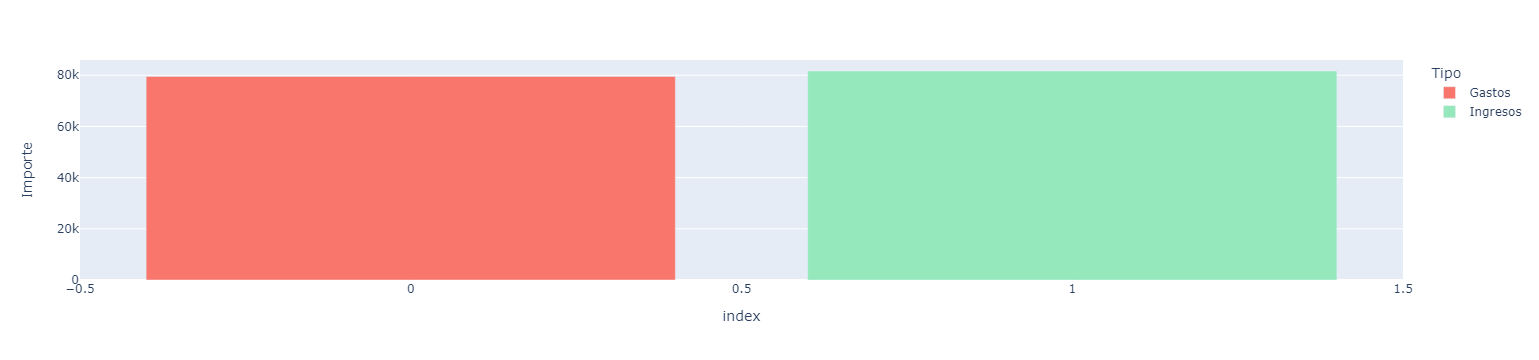

In [22]:
import plotly.express as px
fig = px.bar(df_hogar_total, color = "Tipo", y='Importe', color_discrete_map=color_discrete_map)
fig.show()

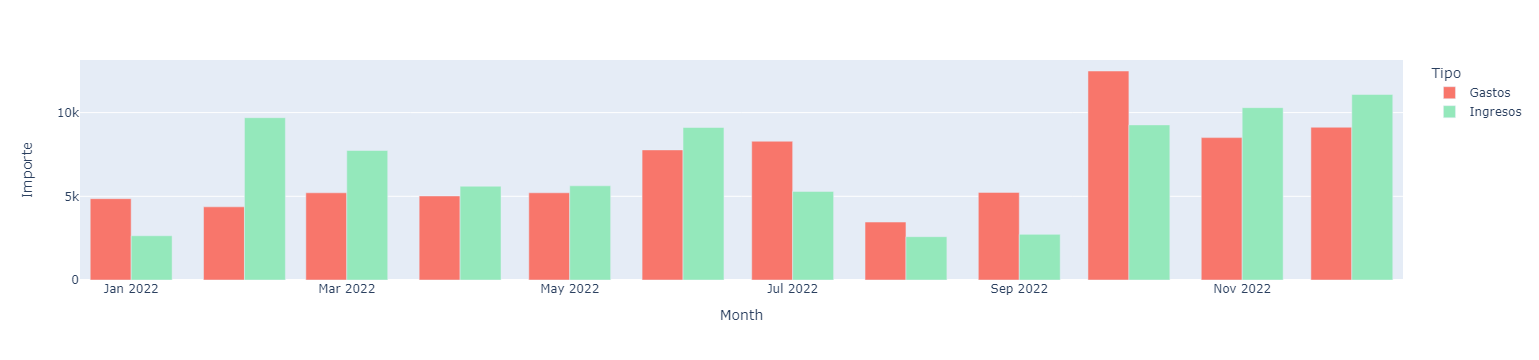

In [23]:
import plotly.express as px
fig = px.bar(df_hogar_bar, x = "Month",  y='Importe', color = "Tipo", barmode='group', color_discrete_map=color_discrete_map)
fig.show()

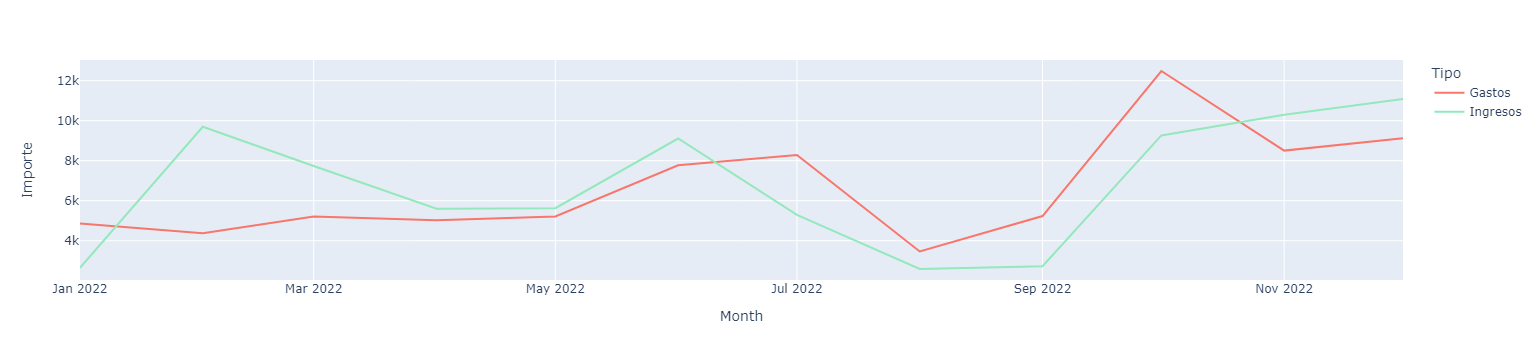

In [24]:
import plotly.express as px
fig = px.line(df_hogar_bar, x = "Month",  y='Importe', color = "Tipo", color_discrete_map=color_discrete_map)
fig.show()

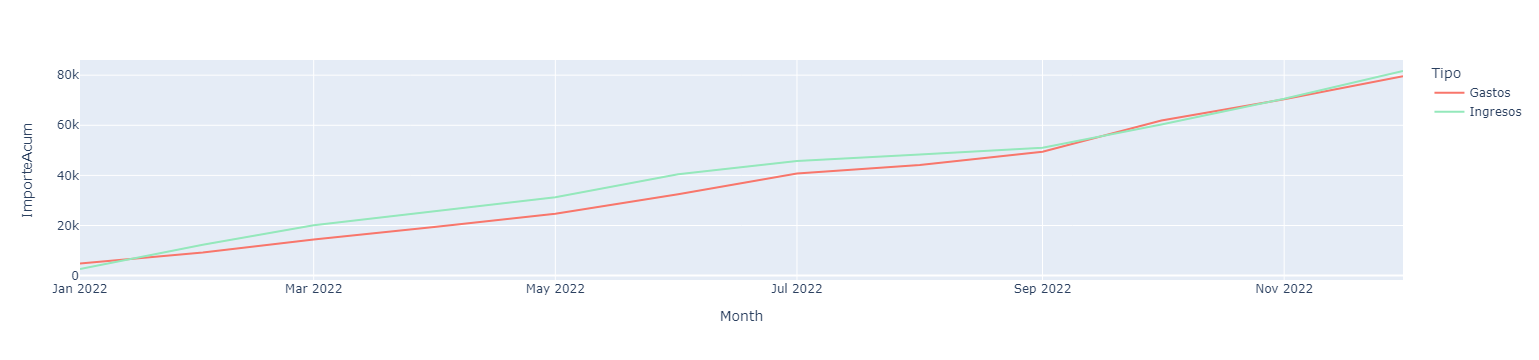

In [25]:
import plotly.express as px
fig = px.line(df_hogar_bar, x = "Month",  y='ImporteAcum', color = "Tipo", color_discrete_map=color_discrete_map)
fig.show()